In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast

## Data Exploration

In [2]:
full_data = pd.read_excel("../data/RNADataNew.xlsx", usecols="A:D")

In [3]:
data = full_data.to_numpy()

In [4]:
full_data

,RNA_name,RNA_length,RNA_sequence,RNA_structure
0,Nyctimantis galeata partial tRNA-Gln,17,GUAGGUUCAAUUCCUAU,(((((.......)))))
1,Dendropsophus parviceps (Sarayacu treefrog) pa...,18,GUAGGAAUCGAACCUACA,(((((.......))))).
2,Streptomyces ambofaciens ATCC 23877 tmRNA,18,CGUGGGUUCAAAUCCCAC,.(((((.......)))))
3,Phyllodytes luteolus (yellow heart-tongued fro...,19,UUGCAGGUUCAAUUCCUGU,..(((((.......)))))
4,Arabidopsis thaliana (thale cress) Ath_wt_15851,19,CGGGUUCGAUUCCCGGCUG,((((.......))))....
...,...,...,...,...
414,"Sus scrofa (pig) scRNA (ENSSSCG00005005742.1, ...",410,CGGAACCGGAGGGAGAGCGGCCGGGGCUGAGGUUGCAGUGUGCUGU...,.................................................
415,"Gemmata obscuriglobus transfer-messenger RNA, ...",410,GGGGGCGAUCUGGUAUCGACCGGGUGUCGGAAGUGUUCGGUGGCGU...,(((((((..........(((((((((((..(((((.((((((((((...
416,Eusthenia costalis partial 12S ribosomal RNA,410,UAAACUACGAUUAGAUACCCUAUUAUUUUGAAUGUAAAAAUUAAUG...,.....((((.........))))...........................
417,unclassified sequences Bacteroidales-2 RNA,410,GCACGUCCCGGAUCUUUCCCAAUCCGGCAGCUAACUGUAAGGUGAG...,.......((((((........))))))......................


In [5]:
bins = [10, 31, 51, 71, 91, 111, 131, 151, 171, 191, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 411]

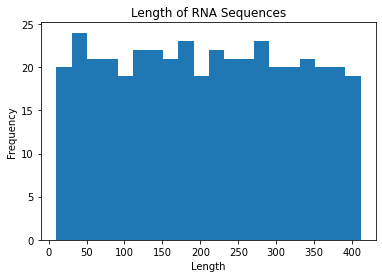

In [6]:
plt.hist(full_data["RNA_length"], bins = bins)
plt.title("Length of RNA Sequences")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.savefig("RNAhist", bbox_inches='tight')

## Analyze Results - BP Score

In [7]:
nuss_BP = pd.read_excel("./BP_scores_full.xlsx", usecols="B,C,H,J")
nuss_BP=nuss_BP.rename(columns={"Nuss_BP_score":"BP_score"})
zuker_BP = pd.read_excel("./BP_scores_full.xlsx", usecols="B,C,L,N")
zuker_BP=zuker_BP.rename(columns={"Zuker_BP_score":"BP_score"})
seqfold_BP = pd.read_excel("./BP_scores_full.xlsx", usecols="B,C,P,R")
seqfold_BP=seqfold_BP.rename(columns={"Seqfold_BP_score":"BP_score"})

In [8]:
length_bins = [11, 31, 51, 71, 91, 111, 131, 151, 171, 191, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391]

In [9]:
nuss_BP_array = np.asarray(nuss_BP)
zuk_BP_array = np.asarray(zuker_BP)
seq_BP_array = np.asarray(seqfold_BP)

In [10]:
nus_avg_bp = []
for bin in length_bins:
    nus_bp = []
    for row in nuss_BP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            nus_bp.append(X)
    nus_avg_bp.append(np.mean(nus_bp))

In [11]:
zuk_avg_bp = []
for bin in length_bins:
    zuk_bp = []
    for row in zuk_BP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            zuk_bp.append(X)
    zuk_avg_bp.append(np.mean(zuk_bp))

In [12]:
seq_avg_bp = []
for bin in length_bins:
    seq_bp = []
    for row in seq_BP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            seq_bp.append(X)
    seq_avg_bp.append(np.mean(seq_bp))

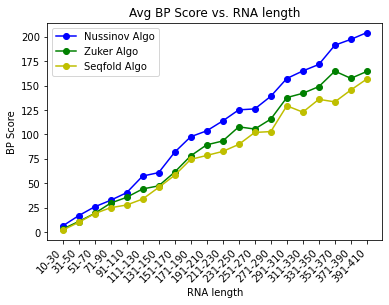

In [13]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nus_avg_bp, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nuss_mean, yerr=nuss_std, ecolor='b')
plt.plot(X,zuk_avg_bp, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seq_avg_bp, c='y', marker='o',label="Seqfold Algo" )
#plt.errorbar(X, zuk_mean, yerr=zuk_std,  ecolor='b')
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("BP Score")
plt.title("Avg BP Score vs. RNA length")
plt.legend()
plt.savefig("BP_plot", bbox_inches='tight')

## Analyze Results - RBP Score

In [14]:
nuss_RBP = pd.read_excel("./RBP_scores_full.xlsx", usecols="B,C,H,J")
nuss_RBP=nuss_RBP.rename(columns={"Nuss_RBP_score":"RBP_score"})
zuker_RBP = pd.read_excel("./RBP_scores_full.xlsx", usecols="B,C,L,N")
zuker_RBP=zuker_RBP.rename(columns={"Zuker_RBP_score":"RBP_score"})
seqfold_RBP = pd.read_excel("./RBP_scores_full.xlsx", usecols="B,C,P,R")
seqfold_RBP=seqfold_RBP.rename(columns={"Seqfold_RBP_score":"RBP_score"})

In [15]:
nuss_RBP_array = np.asarray(nuss_RBP)
zuk_RBP_array = np.asarray(zuker_RBP)
seq_RBP_array = np.asarray(seqfold_RBP)

In [16]:
nus_avg_rbp = []
for bin in length_bins:
    nus_rbp = []
    for row in nuss_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            nus_rbp.append(X)
    nus_avg_rbp.append(np.mean(nus_rbp))

In [17]:
zuk_avg_rbp = []
for bin in length_bins:
    zuk_rbp = []
    for row in zuk_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            zuk_rbp.append(X)
    zuk_avg_rbp.append(np.mean(zuk_rbp))

In [18]:
seq_avg_rbp = []
for bin in length_bins:
    seq_rbp = []
    for row in seq_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[3]
            seq_rbp.append(X)
    seq_avg_rbp.append(np.mean(seq_rbp))

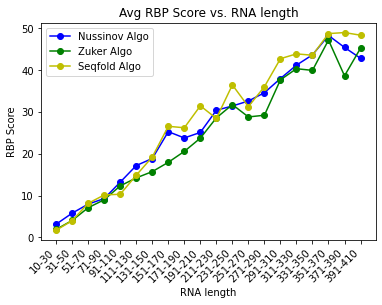

In [19]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nus_avg_rbp, c='b', marker='o', label="Nussinov Algo")
plt.plot(X,zuk_avg_rbp, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seq_avg_rbp, c='y', marker='o',label="Seqfold Algo" )
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("RBP Score")
plt.title("Avg RBP Score vs. RNA length")
plt.legend()
plt.savefig("RBP_plot", bbox_inches='tight')

In [20]:
nus_avg_pairs = []
for bin in length_bins:
    nus_pairs = []
    for row in nuss_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[2]
            X = ast.literal_eval(X)
            nus_pairs.append(len(X))
    nus_avg_pairs.append(np.mean(nus_pairs))

In [21]:
zuk_avg_pairs = []
for bin in length_bins:
    zuk_pairs = []
    for row in zuk_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[2]
            X = ast.literal_eval(X)
            zuk_pairs.append(len(X))
    zuk_avg_pairs.append(np.mean(zuk_pairs))

In [22]:
seq_avg_pairs = []
for bin in length_bins:
    seq_pairs = []
    for row in seq_RBP_array:
        if row[1]>=bin and row[1]<bin+20:
            X = row[2]
            X = ast.literal_eval(X)
            seq_pairs.append(len(X))
    seq_avg_pairs.append(np.mean(seq_pairs))

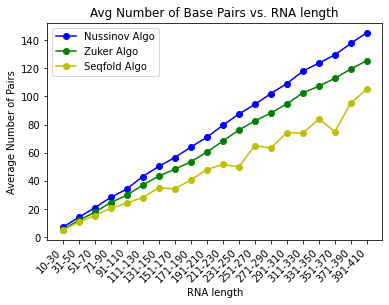

In [23]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nus_avg_pairs, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nuss_mean, yerr=nuss_std, ecolor='b')
plt.plot(X,zuk_avg_pairs, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seq_avg_pairs, c='y', marker='o',label="Seqfold Algo" )
#plt.errorbar(X, zuk_mean, yerr=zuk_std,  ecolor='b')
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("Average Number of Pairs")
plt.title("Avg Number of Base Pairs vs. RNA length")
plt.legend()
plt.savefig("NumberOfPairs", bbox_inches='tight')

In [24]:
nuss_mean = []
nuss_std = []
zuk_mean = []
zuk_std = []
seq_mean = []
seq_std = []

In [25]:
def create_df_in_range(lower_bound, upper_bound):
    nuss = nuss_RBP[nuss_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    zuk = zuker_RBP[zuker_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    seqfold = seqfold_RBP[seqfold_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    return nuss, zuk, seqfold

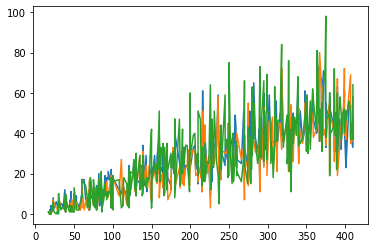

In [26]:
plt.plot(nuss_RBP["RNA_length"], nuss_RBP["RBP_score"])
plt.plot(zuker_RBP["RNA_length"], zuker_RBP["RBP_score"])
plt.plot(seqfold_RBP["RNA_length"], seqfold_RBP["RBP_score"])

In [27]:
def format_data(nuss_df, zuk_df, seq_df):
    zuk1 = zuk_df["RBP_score"].tolist()
    nuss1 = nuss_df["RBP_score"].tolist()
    seq1 = seq_df["RBP_score"].tolist()
    zipped_scores = zip(nuss1, zuk1, seq1)
    zipped_scores = list(zipped_scores)
    return np.mean(nuss1), np.std(nuss1), np.mean(zuk1), np.std(zuk1), np.mean(seq1), np.std(seq1), zipped_scores

In [28]:
def plot_data(score_list, plot_name):
    x = ["Nussinov", "Zuker", "Seqfold"]
    for item in score_list:
        plt.plot(x,item, 'o-')
    ax = plt.gca()
    ax.set_ylim([0, 100])
    plt.xlabel("Algorithm")
    plt.ylabel("RBP Score")
    plt.title(plot_name)

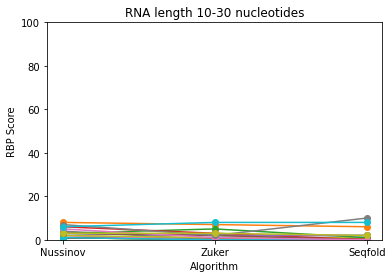

In [29]:
nuss30, zuk30, seq30 = create_df_in_range(10, 31)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss30, zuk30, seq30)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 10-30 nucleotides")

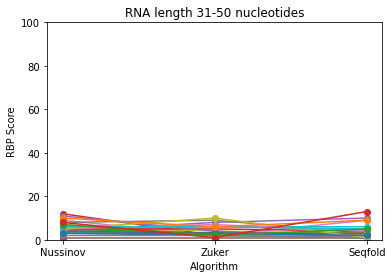

In [30]:
nuss50, zuk50, seq50 = create_df_in_range(31, 51)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss50, zuk50, seq50)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 31-50 nucleotides")

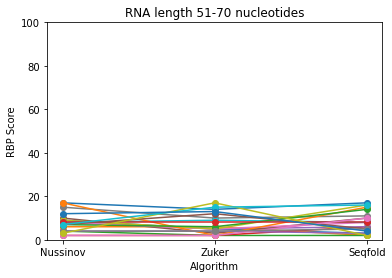

In [31]:
nuss70, zuk70, seq70 = create_df_in_range(51, 71)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss70, zuk70, seq70)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 51-70 nucleotides")

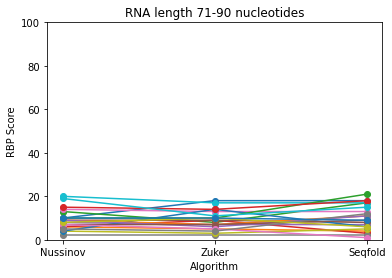

In [32]:
nuss90, zuk90, seq90 = create_df_in_range(71, 91)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss90, zuk90, seq90)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 71-90 nucleotides")

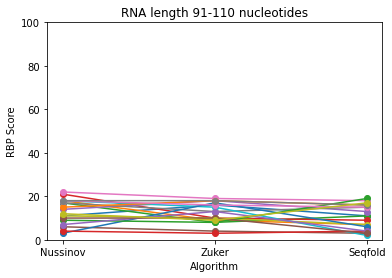

In [33]:
nuss110, zuk110, seq110 = create_df_in_range(91, 111)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss110, zuk110, seq110)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 91-110 nucleotides")

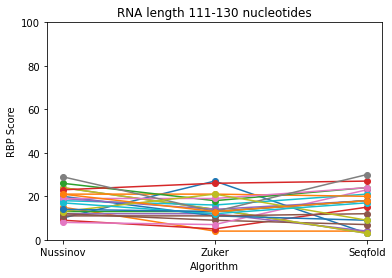

In [34]:
nuss130, zuk130, seq130 = create_df_in_range(111, 131)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss130, zuk130, seq130)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 111-130 nucleotides")

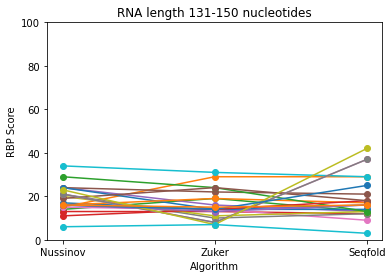

In [35]:
nuss150, zuk150, seq150 = create_df_in_range(131, 151)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss150, zuk150, seq150)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 131-150 nucleotides")

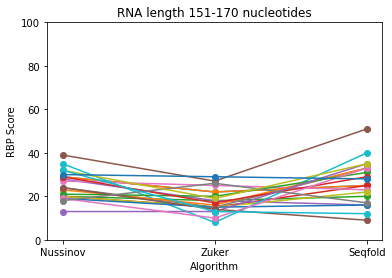

In [36]:
nuss170, zuk170, seq170 = create_df_in_range(151, 171)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss170, zuk170, seq170)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 151-170 nucleotides")

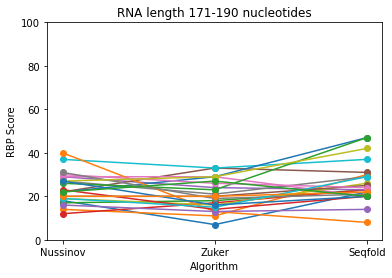

In [37]:
nuss190, zuk190, seq190 = create_df_in_range(171, 191)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss190, zuk190, seq190)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 171-190 nucleotides")

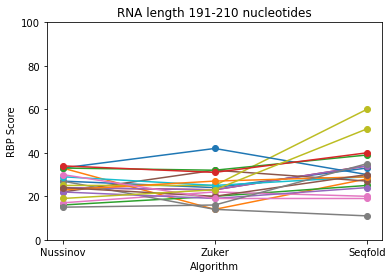

In [38]:
nuss210, zuk210, seq210 = create_df_in_range(191, 211)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss210, zuk210, seq210)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 191-210 nucleotides")

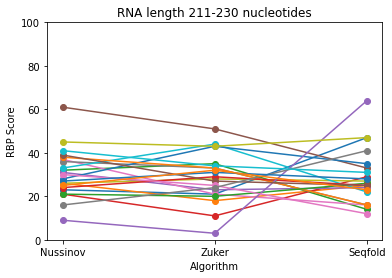

In [39]:
nuss230, zuk230, seq230 = create_df_in_range(211, 231)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss230, zuk230, seq230)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 211-230 nucleotides")

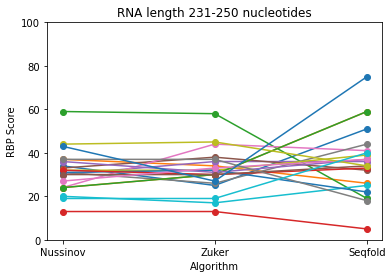

In [40]:
nuss250, zuk250, seq250 = create_df_in_range(231, 251)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss250, zuk250, seq250)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 231-250 nucleotides")

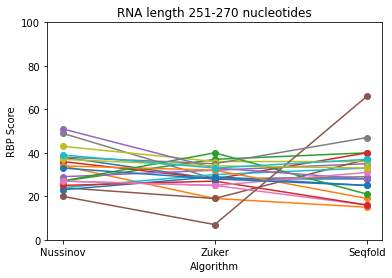

In [41]:
nuss270, zuk270, seq270 = create_df_in_range(251, 271)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss270, zuk270, seq270)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 251-270 nucleotides")

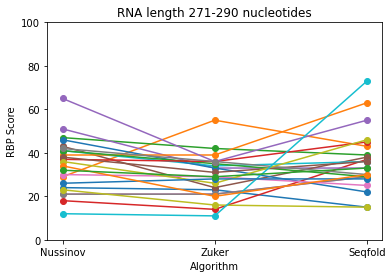

In [42]:
nuss290, zuk290, seq290 = create_df_in_range(271, 291)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss290, zuk290, seq290)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 271-290 nucleotides")

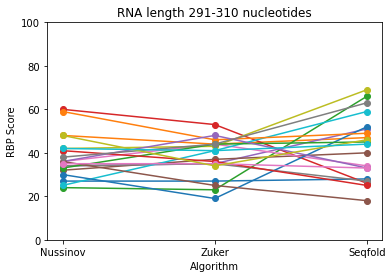

In [43]:
nuss310, zuk310, seq310 = create_df_in_range(291, 311)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss310, zuk310, seq310)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 291-310 nucleotides")

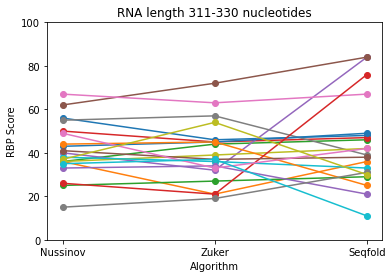

In [44]:
nuss330, zuk330, seq330 = create_df_in_range(311, 331)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss330, zuk330, seq330)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 311-330 nucleotides")

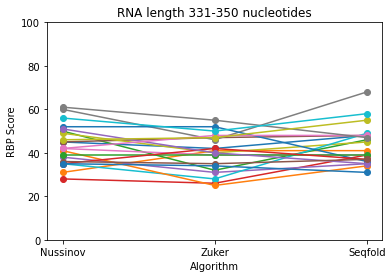

In [45]:
nuss350, zuk350, seq350 = create_df_in_range(331, 351)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss350, zuk350, seq350)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 331-350 nucleotides")

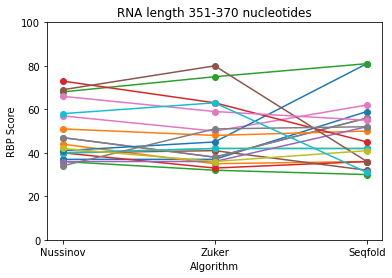

In [46]:
nuss370, zuk370, seq370 = create_df_in_range(351, 371)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss370, zuk370, seq370)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 351-370 nucleotides")

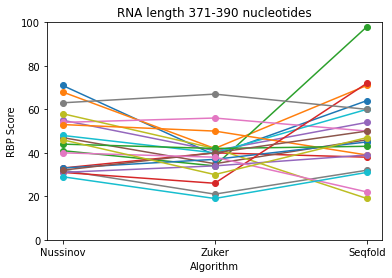

In [47]:
nuss390, zuk390, seq390 = create_df_in_range(371, 391)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss390, zuk390, seq390)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 371-390 nucleotides")

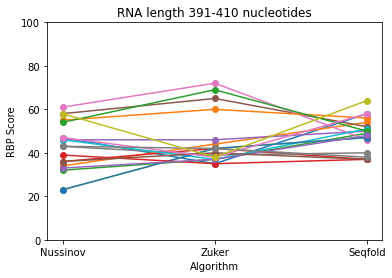

In [48]:
nuss410, zuk410, seq410 = create_df_in_range(391, 411)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss410, zuk410, seq410)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 391-410 nucleotides")

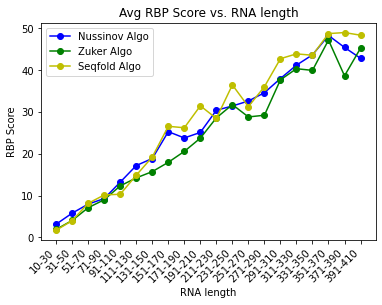

In [49]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nuss_mean, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nuss_mean, yerr=nuss_std, ecolor='b')
plt.plot(X,zuk_mean, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seq_mean, c='y', marker='o',label="Seqfold Algo" )
#plt.errorbar(X, zuk_mean, yerr=zuk_std,  ecolor='b')
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("RBP Score")
plt.title("Avg RBP Score vs. RNA length")
plt.legend()
#plt.savefig("RBP_plot", bbox_inches='tight')

## Analyze Results- Tree Alignment

In [50]:
tree_alignment = pd.read_excel("./TreeAlignmentScores.xlsx", usecols="B:F")

In [51]:
tree_alignment

,RNA_name,RNA_length,Nuss_Extended_tree,Zuker_Extended_tree,Seqfold_Extended_tree
0,Nyctimantis galeata partial tRNA-Gln,17,1.641602,1.625000,1.625000
1,Dendropsophus parviceps (Sarayacu treefrog) pa...,18,0.141602,0.000000,0.000000
2,Streptomyces ambofaciens ATCC 23877 tmRNA,18,0.141602,0.000000,0.000000
3,Phyllodytes luteolus (yellow heart-tongued fro...,19,0.141602,0.000000,0.000000
4,Arabidopsis thaliana (thale cress) Ath_wt_15851,19,1.641633,0.000000,0.000000
...,...,...,...,...,...
412,Ensifer adhaerens OV14 Cobalamin riboswitch,407,3.443577,3.442569,0.142640
413,Marmota monax (woodchuck) non-coding RNA,407,2.742343,2.260014,2.741366
414,"Sus scrofa (pig) scRNA (ENSSSCG00005005742.1, ...",410,2.085116,2.084140,2.599733
415,"Gemmata obscuriglobus transfer-messenger RNA, ...",410,1.658265,1.658266,0.142640


In [52]:
tree_array = tree_alignment.to_numpy()

In [53]:
tree_array

array([['Nyctimantis galeata partial tRNA-Gln', 17, 1.6416015625, 1.625,
        1.625],
       ['Dendropsophus parviceps (Sarayacu treefrog) partial tRNA-Gln',
        18, 0.1416015625, 0.0, 0.0],
       ['Streptomyces ambofaciens ATCC 23877 tmRNA', 18, 0.1416015625,
        0.0, 0.0],
       ...,
       ['Sus scrofa (pig) scRNA (ENSSSCG00005005742.1, ENSSSCG00035003960.1)',
        410, 2.0851164051275077, 2.0841398426275077, 2.599733363895325],
       ['Gemmata obscuriglobus transfer-messenger RNA, SsrA', 410,
        1.6582651213103077, 1.658266082449785, 0.14264012131030773],
       ['Eusthenia costalis partial 12S ribosomal RNA', 410,
        2.4082961232052753, 2.409304160683007, 0.7510080487118671]],
      dtype=object)

In [54]:
length_bins = [11, 31, 51, 71, 91, 111, 131, 151, 171, 191, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391]

In [55]:
nus_tree_d = []
nus_tree_std = []
zuk_tree_d = []
zuk_tree_std = []
seqfold_tree_d = []
seqfold_tree_std = []
for bin in length_bins:
    nus_d = []
    zuk_d = []
    seq_d = []
    for row in tree_array:
        if row[1]>=bin and row[1]<bin+20:
            nus_d.append(row[2])
            zuk_d.append(row[3])
            seq_d.append(row[4])
    nus_tree_d.append(np.mean(nus_d))
    nus_tree_std.append(np.std(nus_d))
    zuk_tree_d.append(np.mean(zuk_d))
    zuk_tree_std.append(np.std(zuk_d))
    seqfold_tree_d.append(np.mean(seq_d))
    seqfold_tree_std.append(np.std(seq_d))

In [56]:
nus_tree_d = []
nus_tree_std = []
zuk_tree_d = []
zuk_tree_std = []
seqfold_tree_d = []
seqfold_tree_std = []
for bin in length_bins:
    nus_d = []
    zuk_d = []
    seq_d = []
    for row in tree_array:
        if row[1]>=bin and row[1]<bin+20:
            nus_d.append(row[2])
            zuk_d.append(row[3])
            seq_d.append(row[4])
    nus_tree_d.append(np.mean(nus_d))
    nus_tree_std.append(np.std(nus_d))
    zuk_tree_d.append(np.mean(zuk_d))
    zuk_tree_std.append(np.std(zuk_d))
    seqfold_tree_d.append(np.mean(seq_d))
    seqfold_tree_std.append(np.std(seq_d))

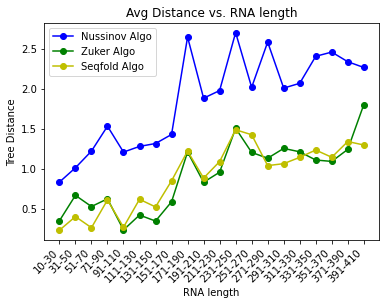

In [57]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nus_tree_d, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nus_tree_d, yerr=nus_tree_std, ecolor='b')
plt.plot(X,zuk_tree_d, c='g', marker='o',label="Zuker Algo" )
#plt.errorbar(X, zuk_tree_d, yerr=zuk_tree_std,  ecolor='y')
plt.plot(X,seqfold_tree_d, c='y', marker='o',label="Seqfold Algo" )
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("Tree Distance")
plt.title("Avg Distance vs. RNA length")
plt.legend()
plt.savefig("TreeDistance_Plot", bbox_inches='tight')

# Closer look at 171-90 range:

In [58]:
nus_d_171 = []
zuk_d_171 = []
seq_d_171 = []
for row in tree_array:
    if row[1]>=171 and row[1]<191:
        nus_d_171.append(row[2])
        zuk_d_171.append(row[3])
        seq_d_171.append(row[4])

In [59]:
np.mean(zuk_d_171)

1.2097038086162757

In [60]:
np.std(zuk_d_171)

1.196174012942624

In [61]:
np.mean(seq_d_171)

1.2211845499633436

In [62]:
np.std(seq_d_171)

1.001297061607154

In [63]:
#create a boxplot

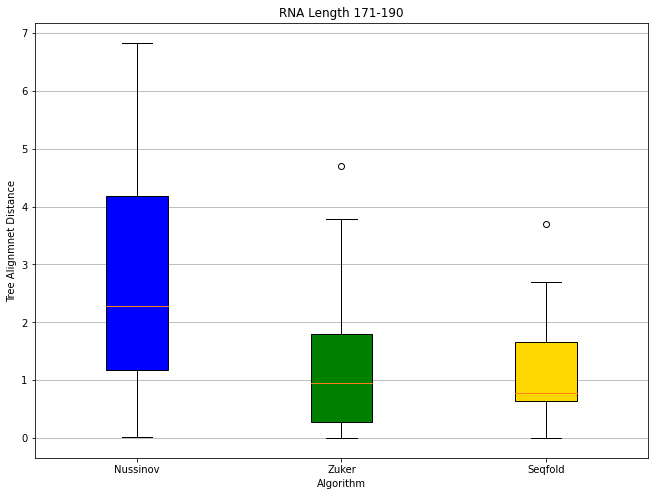

In [64]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
labels = ["Nussinov", "Zuker", "Seqfold"]
bplot1 = ax1.boxplot([nus_d_171,zuk_d_171, seq_d_171], vert=True, patch_artist=True, labels=labels)
                    #boxprops=dict(facecolor='#3d3dcc'))
colors = ["blue", 'green', 'gold']
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

ax1.set_title('RNA Length 171-190')
colors = ['pink', 'lightblue', 'lightgreen']
# for bplot in (bplot1):
#     for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color)


ax1.yaxis.grid(True)
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Tree Alignmnet Distance')
plt.savefig("box_plot")

## Build a structure dot plot for paper to explain RBP

<ipython-input-65-5eb7219e1078>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([16,14,12,10,8,6,4,2])


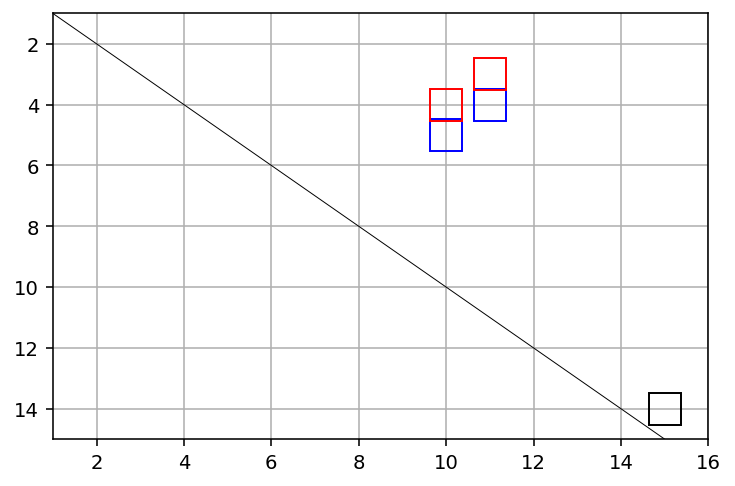

In [65]:
#sequence1 = [[4,11] [5,10], [14,15]]
#sequence2 = [[3,11], [4,10], [14,15]]

#create diagonal line y = -x
fig, ax = plt.subplots(dpi=141)
X = np.linspace(1, 15)
plt.grid()
#plt.yticks(np.arange(-15, -1, .5))
plt.plot(X, -X, 'k', linewidth=.5)
ax.set_yticklabels([16,14,12,10,8,6,4,2])
plt.plot(11,-4, 'bs', markerfacecolor='none', markersize=16)
plt.plot(10,-5, 'bs', markerfacecolor='none', markersize=16)
plt.plot(11,-3, 'rs', markerfacecolor='none', markersize=16)
plt.plot(10,-4, 'rs', markerfacecolor='none', markersize=16)
plt.plot(15,-14, 'ks', markerfacecolor='none', markersize=16)
ax.set_xlim(1, 16)
ax.set_ylim(-15, -1)
#plt.semilogy(11, -4, 'ks-', , label='DCTCP-PQ47.5')
s = (ax.get_window_extent().width)
plt.savefig("RBP_illustration")